In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/insurance-claims-dataset/insurance_claims.csv


In [2]:
# Importing librariesimport pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [3]:
Importing datasetdata=pd.read_csv('../input/insurance-claims-dataset/insurance_claims.csv')

<AxesSubplot:>

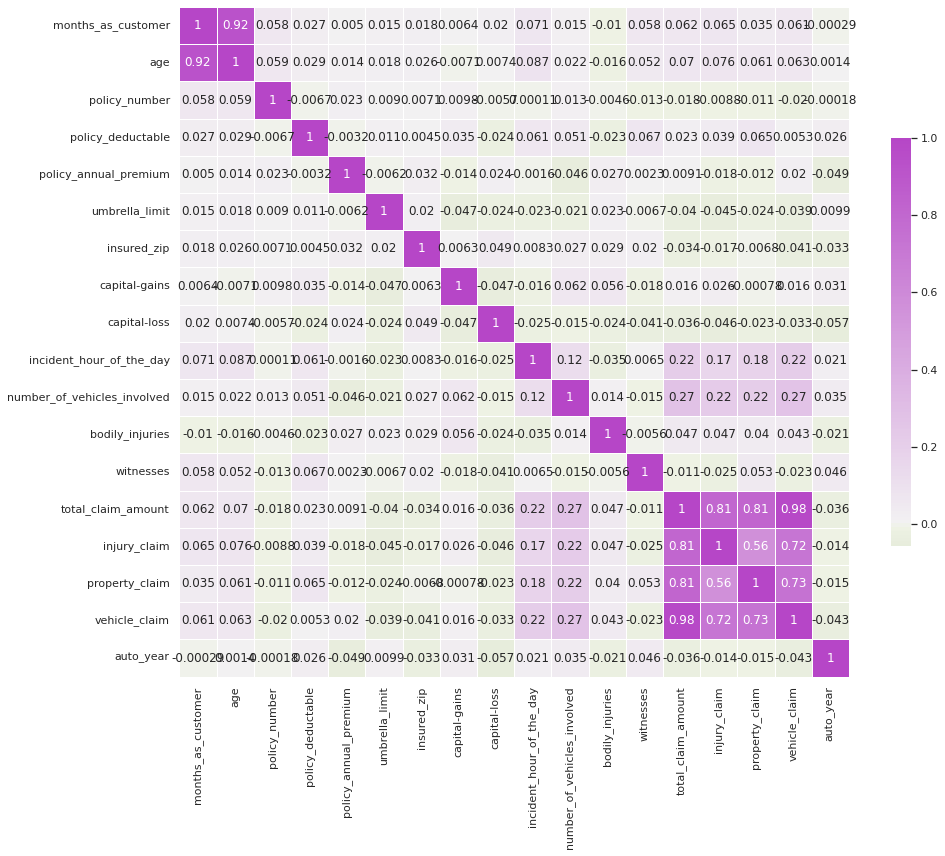

In [4]:
sb.set(style="white")
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))
cmap = sb.diverging_palette(100,300, as_cmap=True)

sb.heatmap(data.corr(), cmap=cmap, vmax=1.0, center=0,annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [5]:
data=data.drop(['authorities_contacted','incident_state','incident_city'],axis=1)

In [6]:
data.isna().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
capital-gains                  0
capital-loss                   0
incident_type                  0
incident_severity              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
bodily_injuries                0
witnesses                      0
total_claim_amount             0
injury_claim                   0
property_claim                 0
vehicle_claim                  0
auto_make                      0
auto_year                      0
fraud_reported                 0
dtype: int64

In [7]:
X=data.drop(['fraud_reported'],axis=1)
Y=data['fraud_reported'].copy()

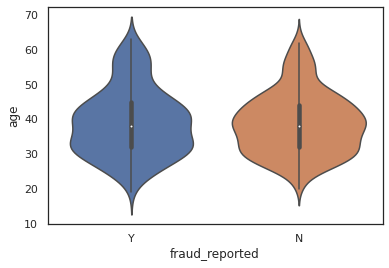

In [8]:
ax = sb.violinplot(x=Y,y=X['age'])

([<matplotlib.patches.Wedge at 0x7f190525dcd0>,
 [Text(-0.7851136132870644, 0.7704522141128092, 'N'),
  Text(0.785113649354535, -0.7704521773589873, 'Y')])

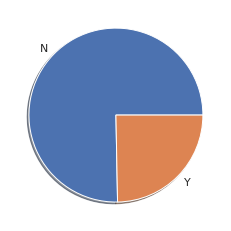

In [9]:
a=data['fraud_reported'].value_counts()
plt.pie(x=a.values,labels=a.index,shadow=True)

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [11]:
from sklearn.preprocessing import OrdinalEncoder
cod=OrdinalEncoder()
cat=['incident_type','incident_severity']
x_train[cat]=cod.fit_transform(x_train[cat])
x_test[cat]=cod.transform(x_test[cat])

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3673: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3673: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [12]:
x_train=x_train.drop(['auto_make'],axis=1)

x_test=x_test.drop(['auto_make'],axis=1)

In [13]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [14]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

In [15]:
clf_4=CatBoostClassifier(iterations=200,max_depth=4,learning_rate=0.001,loss_function='Logloss')

In [16]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(clf_4,x_train,y_train,cv=5)
print("cross validation scores ",scores)

0:	learn: 0.6925293	total: 51.2ms	remaining: 10.2s
1:	learn: 0.6918441	total: 53.4ms	remaining: 5.28s
2:	learn: 0.6912331	total: 55.2ms	remaining: 3.63s
3:	learn: 0.6905855	total: 56.9ms	remaining: 2.79s
4:	learn: 0.6899384	total: 59.2ms	remaining: 2.31s
5:	learn: 0.6893104	total: 61.1ms	remaining: 1.98s
6:	learn: 0.6886827	total: 62.3ms	remaining: 1.72s
7:	learn: 0.6880327	total: 63.4ms	remaining: 1.52s
8:	learn: 0.6874294	total: 64.8ms	remaining: 1.37s
9:	learn: 0.6867878	total: 66.5ms	remaining: 1.26s
10:	learn: 0.6861630	total: 68.3ms	remaining: 1.17s
11:	learn: 0.6855321	total: 70.1ms	remaining: 1.1s
12:	learn: 0.6849260	total: 71.9ms	remaining: 1.03s
13:	learn: 0.6843123	total: 73.7ms	remaining: 979ms
14:	learn: 0.6837008	total: 75.2ms	remaining: 928ms
15:	learn: 0.6830956	total: 77ms	remaining: 886ms
16:	learn: 0.6824854	total: 79ms	remaining: 851ms
17:	learn: 0.6818652	total: 80.8ms	remaining: 817ms
18:	learn: 0.6812502	total: 82.7ms	remaining: 788ms
19:	learn: 0.6806146	total:

In [17]:
clf_4.fit(x_train,y_train)
pred_4=clf_4.predict(x_test)
print(f"accuracy (test-set): {accuracy_score(pred_4,y_test)*100} %")

0:	learn: 0.6925168	total: 1.18ms	remaining: 235ms
1:	learn: 0.6918557	total: 2.56ms	remaining: 254ms
2:	learn: 0.6912369	total: 3.83ms	remaining: 252ms
3:	learn: 0.6906110	total: 5.11ms	remaining: 250ms
4:	learn: 0.6899598	total: 6.38ms	remaining: 249ms
5:	learn: 0.6893216	total: 7.63ms	remaining: 247ms
6:	learn: 0.6886892	total: 8.93ms	remaining: 246ms
7:	learn: 0.6880382	total: 10.2ms	remaining: 245ms
8:	learn: 0.6874129	total: 11.5ms	remaining: 244ms
9:	learn: 0.6867661	total: 12.8ms	remaining: 242ms
10:	learn: 0.6861479	total: 14ms	remaining: 241ms
11:	learn: 0.6855307	total: 15.3ms	remaining: 240ms
12:	learn: 0.6849088	total: 16.6ms	remaining: 239ms
13:	learn: 0.6842908	total: 17.9ms	remaining: 237ms
14:	learn: 0.6836729	total: 19.1ms	remaining: 235ms
15:	learn: 0.6830622	total: 20.3ms	remaining: 234ms
16:	learn: 0.6824604	total: 21.6ms	remaining: 232ms
17:	learn: 0.6818387	total: 22.8ms	remaining: 231ms
18:	learn: 0.6812207	total: 24.1ms	remaining: 230ms
19:	learn: 0.6806077	tot